Are the scores not really normally distributed?

I am trying to apply a statistical normalization on some scores. The normalization scheme require the  scores to be normally distributed. 
I'am the scipy.stats.normaltest found here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
According to the test, the scores are not normally distributed.
But watching the qqplot, they seems normally distributed.

More the paper applying the normalization scheme shows a qqplot of normally distributed scores which seems visually less incordance with the theoritical values: right plot here: https://pubs.acs.org/appl/literatum/publisher/achs/journals/content/jmcmar/2004/jmcmar.2004.47.issue-1/jm030161o/production/images/large/jm030161of00002.jpeg 

Interestingly I tried a transmation to normalize the scores:
x = x - 2*x  # to transform scores into positive value to apply the log function
log_data = np.log(x)
Still the scores are not normally distributed according to the test.
Am I using the wrong test?

15.707656653124452 0.0003882627229176248
p = 0.000388263
The null hypothesis (x comes from a normal distribution) can be rejected.


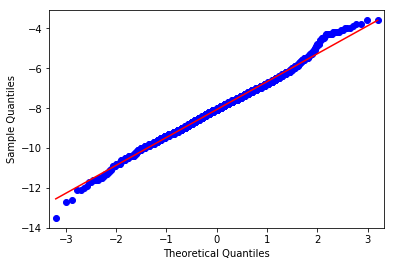

In [5]:
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

scores = [-11.4, -9.2, -11.2, -7.8, -7.8, -7.8, -9.3, -8.6, -8.7, -9.6, -7.4, -8.9, -7.8, -8.0, -7.5, -8.6, -9.2, -9.0, -8.6, -6.8, -9.1, -8.8, -7.7, -9.3, -7.6, -7.4, -8.3, -8.5, -10.0, -8.8, -8.1, -9.5, -8.5, -9.4, -7.7, -8.9, -6.5, -6.5, -6.2, -9.4, -8.2, -7.6, -7.2, -6.2, -8.2, -7.4, -7.5, -8.3, -7.3, -7.9, -6.5, -7.5, -7.2, -7.5, -7.3, -7.9, -7.5, -7.0, -6.9, -7.9, -9.1, -7.4, -8.1, -6.2, -7.2, -7.1, -7.0, -7.4, -6.9, -6.8, -7.2, -8.0, -6.9, -7.2, -7.0, -6.0, -7.5, -8.8, -11.6, -7.6, -7.7, -7.0, -8.7, -8.5, -8.8, -8.9, -6.7, -8.6, -7.5, -7.7, -7.3, -8.5, -8.1, -8.2, -8.3, -7.0, -7.8, -8.0, -6.9, -8.6, -8.8, -7.4, -7.7, -7.7, -8.9, -8.6, -8.6, -8.5, -8.4, -9.5, -7.5, -8.7, -6.2, -6.3, -6.6, -7.1, -7.7, -7.7, -6.7, -6.2, -7.4, -6.7, -6.6, -7.0, -7.0, -6.7, -5.9, -6.5, -6.3, -7.3, -7.1, -7.5, -7.3, -5.8, -7.1, -7.3, -6.1, -7.2, -7.2, -6.0, -6.9, -6.2, -6.7, -7.7, -6.8, -6.7, -6.5, -7.5, -6.1, -6.4, -5.9, -5.9, -5.3, -6.3, -6.3, -5.7, -5.7, -4.8, -5.8, -5.6, -5.5, -6.4, -6.1, -6.0, -5.1, -5.5, -5.7, -6.0, -5.5, -6.1, -5.9, -5.2, -5.4, -5.9, -6.6, -5.4, -5.8, -4.9, -5.5, -5.3, -5.8, -6.2, -5.3, -5.6, -5.5, -6.1, -6.4, -5.9, -5.5, -5.3, -7.6, -8.3, -8.4, -7.2, -6.7, -6.3, -8.5, -7.5, -8.3, -8.6, -8.2, -7.8, -6.7, -7.2, -7.0, -8.0, -6.8, -9.1, -7.5, -6.8, -7.7, -9.1, -7.6, -7.6, -8.6, -6.2, -7.1, -7.5, -7.5, -7.9, -7.0, -7.9, -7.9, -7.9, -8.3, -7.3, -7.0, -5.5, -8.3, -10.8, -10.6, -9.8, -8.7, -8.4, -12.1, -9.8, -8.9, -10.9, -8.1, -9.3, -7.8, -9.6, -9.3, -8.2, -9.1, -9.8, -10.3, -8.8, -10.9, -9.7, -9.4, -9.9, -9.4, -8.3, -8.6, -9.6, -8.5, -7.8, -8.9, -9.0, -9.0, -9.9, -9.7, -9.9, -9.1, -7.9, -6.3, -7.2, -7.1, -6.2, -5.9, -5.1, -6.8, -6.2, -6.7, -7.1, -7.1, -6.6, -5.9, -6.6, -6.2, -6.9, -6.3, -7.6, -7.0, -5.5, -6.5, -6.8, -6.9, -6.4, -6.8, -5.6, -6.2, -6.5, -6.7, -6.9, -5.9, -6.2, -7.0, -6.8, -7.5, -6.4, -6.1, -5.2, -8.0, -7.7, -8.3, -7.4, -6.3, -6.6, -8.0, -7.5, -7.2, -8.1, -6.8, -7.7, -6.4, -7.0, -6.7, -8.4, -7.6, -6.5, -8.1, -6.6, -7.8, -7.1, -6.8, -7.0, -7.8, -6.4, -7.6, -6.8, -7.8, -7.2, -6.8, -8.1, -8.3, -8.5, -6.7, -7.4, -6.3, -5.6, -6.8, -9.8, -9.5, -8.4, -8.2, -7.6, -9.6, -8.8, -8.6, -9.8, -9.6, -9.3, -7.4, -8.1, -8.3, -7.6, -8.0, -10.1, -8.9, -8.4, -9.1, -10.1, -8.5, -8.5, -9.2, -6.7, -8.2, -8.6, -7.8, -8.1, -8.0, -7.3, -9.0, -8.4, -8.2, -9.3, -7.6, -6.9, -6.6, -10.0, -7.8, -9.3, -7.7, -8.2, -9.2, -9.1, -9.9, -9.4, -12.1, -10.6, -8.1, -10.3, -9.9, -7.6, -9.8, -9.9, -9.9, -9.1, -10.1, -9.9, -9.0, -10.1, -9.7, -7.8, -10.8, -8.9, -8.8, -9.3, -9.7, -8.1, -9.7, -9.4, -10.0, -9.0, -8.4, -7.9, -9.0, -9.3, -9.3, -8.9, -8.3, -8.2, -9.3, -7.7, -8.4, -9.4, -7.8, -8.8, -6.9, -8.8, -7.7, -8.1, -8.6, -9.0, -8.4, -7.7, -8.0, -9.1, -8.0, -9.1, -7.5, -7.2, -8.2, -7.6, -7.6, -10.0, -8.3, -8.8, -9.0, -9.3, -7.6, -8.8, -7.5, -7.0, -8.1, -8.4, -8.3, -7.4, -6.9, -6.8, -7.7, -7.7, -7.7, -8.4, -6.5, -7.8, -8.7, -7.4, -6.7, -9.4, -7.7, -8.0, -8.2, -6.4, -8.1, -7.6, -7.1, -8.2, -7.6, -6.7, -7.2, -7.4, -8.1, -9.8, -7.2, -7.7, -8.0, -9.0, -7.8, -8.1, -6.7, -5.6, -10.8, -9.8, -9.8, -8.6, -8.1, -7.6, -9.5, -9.3, -8.8, -10.1, -6.9, -8.4, -7.6, -8.0, -7.7, -7.6, -9.5, -9.4, -8.5, -7.1, -9.3, -9.0, -8.3, -10.3, -7.9, -7.7, -9.1, -8.1, -9.3, -9.7, -7.9, -9.7, -9.2, -9.8, -8.4, -9.5, -6.6, -6.4, -7.1, -9.0, -8.2, -7.9, -7.1, -7.2, -9.4, -7.5, -7.2, -9.0, -8.2, -8.7, -6.8, -8.1, -8.2, -6.8, -7.6, -8.6, -9.5, -6.7, -8.5, -9.5, -7.5, -7.4, -9.2, -6.7, -7.9, -7.6, -7.9, -8.0, -8.0, -7.5, -7.5, -8.6, -7.6, -8.1, -7.4, -6.4, -6.0, -7.8, -8.2, -6.9, -6.2, -7.0, -7.3, -7.8, -7.0, -8.0, -6.1, -7.5, -7.6, -6.6, -6.7, -9.6, -7.4, -7.0, -7.4, -6.2, -6.9, -7.0, -6.5, -7.6, -6.9, -6.3, -7.2, -6.6, -7.1, -8.8, -6.9, -7.6, -7.4, -8.6, -7.1, -7.7, -6.3, -5.4, -8.6, -11.5, -8.1, -9.1, -7.9, -8.2, -9.0, -10.7, -9.5, -11.7, -7.5, -9.3, -8.4, -9.9, -8.7, -8.5, -10.4, -8.9, -10.0, -7.1, -9.2, -9.9, -8.0, -10.4, -7.8, -7.7, -10.4, -8.4, -10.6, -9.3, -9.1, -9.3, -12.0, -11.1, -8.9, -10.0, -7.6, -6.9, -9.3, -10.4, -10.4, -9.8, -8.2, -8.5, -8.6, -9.6, -9.8, -10.5, -8.7, -9.8, -9.5, -8.4, -8.4, -8.2, -9.4, -9.5, -8.9, -8.6, -8.9, -8.6, -9.4, -9.3, -9.0, -7.4, -8.7, -9.2, -9.5, -10.8, -8.6, -8.1, -9.7, -10.5, -8.3, -9.7, -7.8, -7.1, -5.5, -4.0, -5.0, -4.5, -4.2, -3.9, -4.1, -4.2, -4.5, -4.2, -3.8, -4.8, -4.0, -4.3, -4.3, -4.5, -5.2, -4.5, -4.6, -3.6, -4.3, -3.8, -4.3, -4.3, -4.3, -4.0, -4.2, -4.6, -5.6, -5.1, -4.1, -4.8, -4.3, -4.8, -4.9, -4.4, -4.2, -3.6, -7.8, -10.9, -8.0, -8.6, -8.8, -8.3, -7.5, -7.8, -8.6, -10.4, -9.8, -10.1, -7.6, -9.1, -8.7, -7.7, -8.8, -10.2, -9.9, -9.0, -8.7, -10.9, -8.3, -9.0, -7.6, -7.5, -9.9, -8.3, -9.6, -7.9, -9.5, -7.9, -9.9, -8.5, -9.2, -8.1, -8.0, -8.0, -8.4, -11.6, -10.5, -9.2, -8.5, -9.2, -10.6, -10.4, -9.5, -11.5, -8.6, -10.2, -8.2, -10.3, -9.7, -8.1, -9.6, -9.9, -9.6, -7.4, -11.6, -9.6, -8.1, -10.6, -7.8, -7.8, -10.1, -9.0, -10.0, -10.4, -9.4, -9.0, -9.9, -12.7, -9.3, -9.8, -7.2, -7.5, -9.0, -9.8, -9.5, -8.6, -8.3, -7.7, -9.7, -9.1, -8.7, -9.8, -7.4, -8.9, -8.1, -8.3, -7.6, -8.0, -9.8, -9.3, -9.2, -7.2, -9.3, -9.1, -8.1, -10.5, -7.9, -7.7, -9.0, -8.1, -10.4, -9.6, -7.9, -9.5, -9.0, -9.7, -8.3, -9.8, -6.5, -6.5, -6.8, -10.0, -8.1, -7.6, -7.0, -6.5, -8.7, -7.7, -7.4, -9.3, -7.4, -7.8, -6.3, -7.8, -6.9, -7.8, -7.3, -7.8, -7.8, -6.9, -7.2, -8.0, -9.4, -7.6, -8.2, -6.4, -7.2, -7.3, -6.8, -7.3, -6.9, -7.6, -7.3, -8.3, -7.3, -7.0, -7.0, -5.9, -10.6, -9.1, -6.8, -8.7, -8.0, -7.2, -9.1, -8.8, -8.6, -9.2, -7.0, -8.4, -7.8, -7.8, -7.2, -8.1, -9.6, -9.5, -8.5, -6.9, -9.4, -9.0, -8.2, -10.4, -7.9, -7.7, -9.0, -8.3, -10.0, -9.4, -8.0, -9.9, -8.9, -9.7, -8.4, -9.8, -7.1, -6.3, -7.2, -9.4, -9.7, -8.5, -7.7, -7.3, -8.8, -8.9, -8.1, -9.4, -7.9, -9.2, -7.5, -7.7, -8.1, -8.5, -8.2, -8.4, -8.8, -7.6, -8.2, -8.4, -8.7, -8.8, -11.1, -7.5, -8.2, -8.1, -8.0, -9.0, -7.8, -7.7, -8.2, -9.8, -8.4, -8.2, -8.1, -6.9, -6.0, -8.3, -6.6, -7.9, -6.4, -6.6, -7.2, -7.3, -6.8, -8.4, -6.5, -7.7, -7.4, -7.5, -7.1, -5.7, -7.1, -7.6, -8.0, -6.5, -7.5, -8.4, -6.8, -7.6, -6.3, -7.8, -7.2, -7.1, -6.6, -7.1, -7.0, -7.3, -7.2, -7.5, -6.9, -6.5, -6.7, -6.0, -7.3, -11.3, -7.6, -8.3, -8.7, -8.2, -7.8, -8.5, -8.1, -11.7, -9.5, -9.3, -8.1, -9.3, -8.4, -7.3, -8.1, -9.2, -9.1, -8.7, -9.2, -9.6, -8.5, -9.2, -7.7, -7.5, -9.4, -8.2, -7.4, -8.6, -9.6, -8.2, -8.9, -7.8, -8.5, -8.9, -8.1, -7.7, -7.6, -10.4, -9.0, -9.3, -8.8, -8.7, -10.3, -9.2, -9.6, -10.0, -9.3, -9.2, -8.8, -9.2, -9.1, -9.1, -9.1, -9.4, -10.3, -8.6, -9.2, -10.0, -9.5, -9.2, -8.3, -8.3, -8.8, -8.2, -8.7, -8.9, -9.8, -8.5, -9.3, -9.5, -8.9, -9.2, -8.2, -7.6, -10.6, -9.1, -7.1, -7.9, -7.5, -7.4, -9.0, -8.8, -8.1, -9.4, -7.1, -8.9, -7.4, -7.9, -7.4, -9.1, -8.9, -8.5, -8.9, -7.0, -8.9, -8.6, -7.3, -9.1, -8.0, -7.4, -8.8, -8.5, -10.6, -8.9, -7.9, -9.3, -8.3, -9.8, -7.4, -8.4, -6.6, -6.1, -8.6, -8.8, -9.2, -7.9, -7.8, -7.0, -8.0, -8.3, -8.1, -8.8, -7.4, -8.5, -8.8, -7.4, -7.6, -9.7, -8.6, -8.4, -8.4, -6.9, -8.3, -7.9, -7.7, -8.1, -8.1, -6.5, -8.0, -7.5, -8.8, -10.4, -7.5, -8.8, -8.1, -10.0, -8.0, -8.1, -7.1, -5.6, -9.9, -8.1, -10.4, -8.1, -7.5, -7.9, -8.5, -8.1, -8.5, -9.0, -7.3, -8.7, -8.0, -7.8, -7.1, -9.6, -8.5, -7.9, -8.4, -6.9, -8.7, -8.2, -7.0, -8.7, -8.4, -7.2, -8.3, -7.6, -9.0, -8.4, -8.3, -9.4, -8.9, -9.2, -7.6, -8.3, -6.6, -5.8, -6.8, -7.6, -7.9, -6.7, -6.4, -5.7, -7.3, -6.2, -6.9, -7.4, -6.9, -7.1, -6.0, -7.0, -6.7, -7.0, -6.3, -7.1, -7.2, -6.0, -6.6, -7.2, -7.5, -6.4, -7.3, -5.3, -6.5, -6.3, -7.1, -6.8, -6.0, -6.8, -7.0, -7.1, -7.1, -6.6, -6.1, -5.7, -9.0, -11.4, -11.1, -9.1, -8.0, -8.8, -8.6, -9.2, -9.7, -11.9, -8.2, -10.0, -9.0, -10.1, -8.7, -8.7, -10.5, -9.8, -10.5, -7.3, -9.9, -9.1, -7.6, -10.1, -8.0, -8.6, -9.3, -9.0, -9.3, -9.7, -9.1, -9.3, -12.6, -11.5, -9.3, -9.7, -7.1, -7.4, -8.0, -11.3, -9.1, -9.0, -8.0, -9.0, -11.0, -11.3, -9.5, -11.2, -8.5, -10.5, -8.2, -10.7, -9.5, -8.5, -10.2, -10.0, -9.4, -7.3, -11.6, -9.2, -8.8, -10.8, -8.3, -7.0, -10.2, -10.2, -10.8, -8.7, -9.5, -9.5, -10.8, -13.5, -9.4, -10.1, -7.9, -7.3, -8.1, -9.5, -7.4, -8.1, -8.2, -8.2, -10.4, -9.2, -8.4, -9.1, -8.0, -9.4, -7.6, -9.4, -8.9, -8.0, -8.6, -8.5, -9.3, -8.5, -10.3, -9.3, -9.2, -9.2, -7.0, -7.3, -8.6, -8.8, -7.8, -7.8, -9.3, -7.3, -8.4, -8.6, -10.9, -9.6, -8.3, -7.0, -7.0, -9.9, -9.4, -8.9, -7.9, -7.9, -8.9, -9.6, -9.7, -10.1, -8.7, -9.2, -8.3, -8.7, -8.0, -7.7, -8.5, -9.5, -9.1, -8.2, -9.4, -9.1, -8.5, -10.0, -7.8, -7.7, -8.6, -8.6, -8.7, -8.0, -8.5, -8.5, -9.3, -10.0, -8.4, -10.5, -7.9, -7.1, -6.2, -8.9, -6.6, -7.9, -7.9, -7.3, -8.3, -8.0, -8.2, -9.0, -7.7, -8.7, -6.9, -8.1, -8.1, -7.0, -8.5, -8.7, -9.2, -7.3, -7.9, -8.7, -7.6, -8.3, -7.0, -7.5, -8.2, -8.1, -6.7, -7.3, -7.8, -7.9, -8.2, -7.3, -8.0, -7.9, -7.4, -6.7, -6.5, -7.7, -6.9, -7.3, -7.0, -7.6, -7.2, -8.8, -7.0, -7.6, -7.8, -7.9, -6.7, -7.2, -7.4, -7.3, -8.8, -7.7, -7.2, -7.5, -7.7, -6.7, -7.1, -8.2, -7.1, -6.5, -7.6, -7.2, -6.7, -6.3, -9.3, -7.1, -8.3, -8.7, -7.8, -7.6, -6.4, -8.6]
x = np.array(scores)
k2, p = stats.normaltest(x); alpha = 1e-3
print(k2, p)
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis (x comes from a normal distribution) can be rejected.")
else:
    print("The null hypothesis (is not normal) cannot be rejected.")

qqplot(x, line='s') 
plt.show()
